In [327]:
import pandas as pd

***DATA JUMLAH PENDUDUK***

In [328]:
df = pd.read_csv('Jumlah_penduduk_menurut_kabupaten_kota_2018_2020.csv')
df.head()

,Wilayah Jawa Barat,2018,2019,2020
0,Provinsi Jawa Barat,48683861,49316712,49935858
1,Bogor,5840907,5965410,6088233
2,Sukabumi,2460693,2466272,2470219
3,Cianjur,2260620,2263072,2264328
4,Bandung,3717291,3775279,3831505


**DATA LUAS WILAYAH**

In [329]:
dd_2 = pd.read_csv('Luas_daerah_menurut_kabupaten_kota_jawabarat_2020.csv')
dd_2.head()

,Kabupaten/Kota,Ibu Kota Wilayah,Luas Wilayah (Km2),Persentase Terhadap Luas Wilayah,Jumlah Pulau
0,Bogor,Cibinong,2710.62,7.66,NaN
1,Sukabumi,Pelabuhan Ratu\t,4145.70,11.72,NaN
2,Cianjur,Cianjur,3840.16,10.85,NaN
3,Bandung,Soreang,1767.96,5.00,NaN
4,Garut,Torogong Kidul\t,3074.07,8.69,NaN


***GABUNGIN DATA PENDUDUK***

***Cleaning Data Luas Daerah***

In [330]:
dd_2.drop(["Jumlah Pulau"], axis=1, inplace=True)
dd_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Kabupaten/Kota                    28 non-null     object 
 1   Ibu Kota Wilayah                  28 non-null     object 
 2   Luas Wilayah (Km2)                28 non-null     float64
 3   Persentase Terhadap Luas Wilayah  28 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.0+ KB


In [331]:
df_final = df.merge(dd_2, left_on="Wilayah Jawa Barat", right_on="Kabupaten/Kota")
df_final.drop(columns=["Kabupaten/Kota"], inplace=True)
df_final.head()

,Wilayah Jawa Barat,2018,2019,2020,Ibu Kota Wilayah,Luas Wilayah (Km2),Persentase Terhadap Luas Wilayah
0,Bogor,5840907,5965410,6088233,Cibinong,2710.62,7.66
1,Sukabumi,2460693,2466272,2470219,Pelabuhan Ratu\t,4145.70,11.72
2,Cianjur,2260620,2263072,2264328,Cianjur,3840.16,10.85
3,Bandung,3717291,3775279,3831505,Soreang,1767.96,5.00
4,Garut,2606399,2622425,2636637,Torogong Kidul\t,3074.07,8.69


In [332]:
kolom_baru = ["Wilayah Jawa Barat", "Luas Wilayah (Km2)"] + [str(t) for t in range(2018, 2021)] + ["Ibu Kota Wilayah", "Persentase Terhadap Luas Wilayah"]
df_final = df_final[kolom_baru]

In [333]:
df_final.head()

,Wilayah Jawa Barat,Luas Wilayah (Km2),2018,2019,2020,Ibu Kota Wilayah,Persentase Terhadap Luas Wilayah
0,Bogor,2710.62,5840907,5965410,6088233,Cibinong,7.66
1,Sukabumi,4145.70,2460693,2466272,2470219,Pelabuhan Ratu\t,11.72
2,Cianjur,3840.16,2260620,2263072,2264328,Cianjur,10.85
3,Bandung,1767.96,3717291,3775279,3831505,Soreang,5.00
4,Garut,3074.07,2606399,2622425,2636637,Torogong Kidul\t,8.69


***Hitung Kepadatan Penduduk per Tahun***

In [334]:
kepadatan_tahunan = {}

for tahun in range(2018, 2021):
    kolom_kepadatan = f'Kepadatan_{tahun}'
    df_final[kolom_kepadatan] = df_final[str(tahun)] / df_final["Luas Wilayah (Km2)"]
    kepadatan_tahunan[tahun] = df_final[["Wilayah Jawa Barat", kolom_kepadatan]]


In [335]:
df_final.head()

,Wilayah Jawa Barat,Luas Wilayah (Km2),2018,2019,2020,Ibu Kota Wilayah,Persentase Terhadap Luas Wilayah,Kepadatan_2018,Kepadatan_2019,Kepadatan_2020
0,Bogor,2710.62,5840907,5965410,6088233,Cibinong,7.66,2154.823251,2200.754809,2246.066583
1,Sukabumi,4145.70,2460693,2466272,2470219,Pelabuhan Ratu\t,11.72,593.553079,594.898811,595.850882
2,Cianjur,3840.16,2260620,2263072,2264328,Cianjur,10.85,588.678597,589.317112,589.644181
3,Bandung,1767.96,3717291,3775279,3831505,Soreang,5.00,2102.587728,2135.387113,2167.189869
4,Garut,3074.07,2606399,2622425,2636637,Torogong Kidul\t,8.69,847.865859,853.079143,857.702329


#### **Split Dataset**

In [336]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [337]:
X = df_final.drop(columns=["Wilayah Jawa Barat", "Kepadatan_2020", "Ibu Kota Wilayah", "Persentase Terhadap Luas Wilayah"])
y = df_final['Kepadatan_2020']

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [339]:
knn_model = KNeighborsRegressor(n_neighbors=5)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(knn_model, X, y, cv=cv)

MAE: 4406.17
MSE: 30726319.60
RMSE: 5543.13


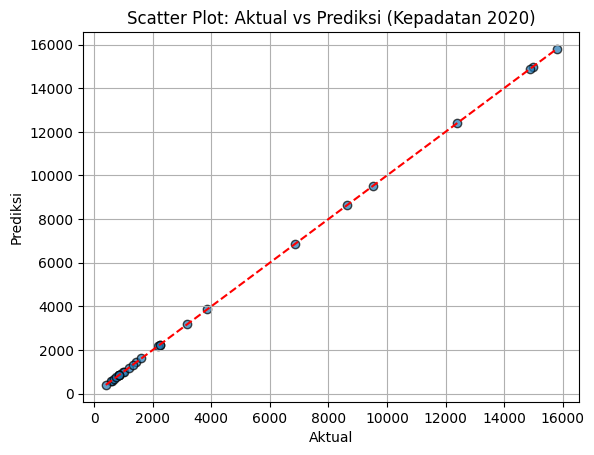

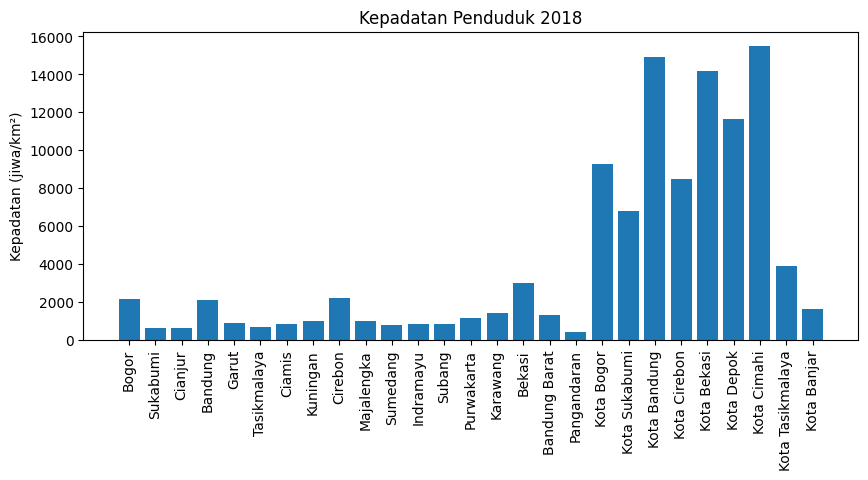

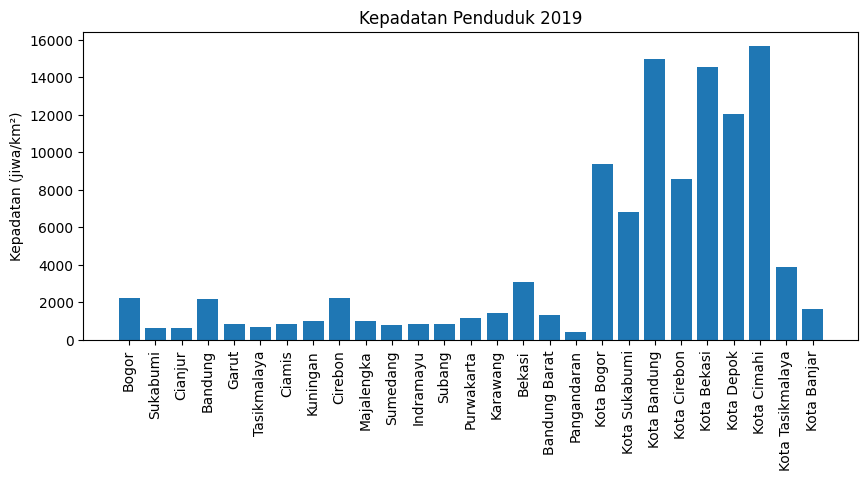

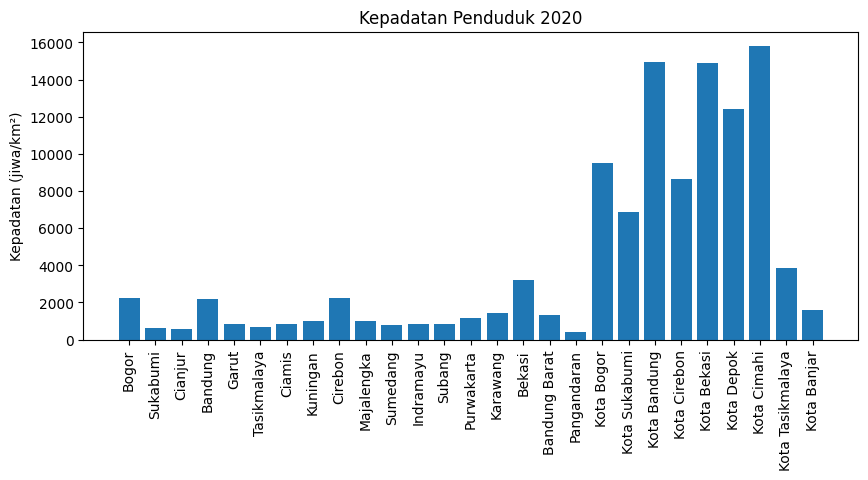

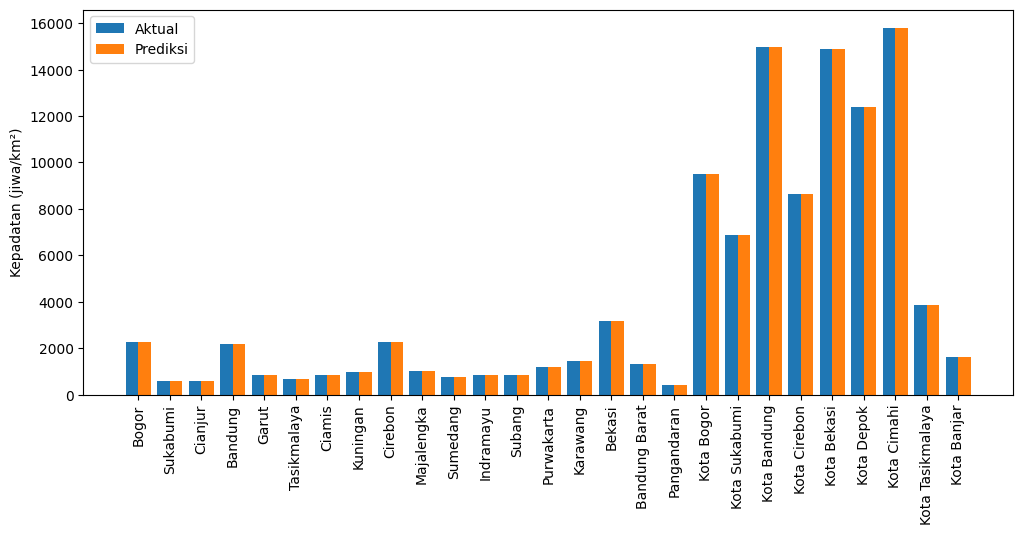

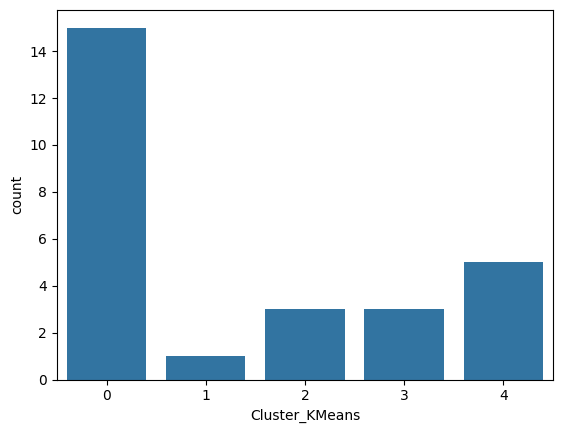

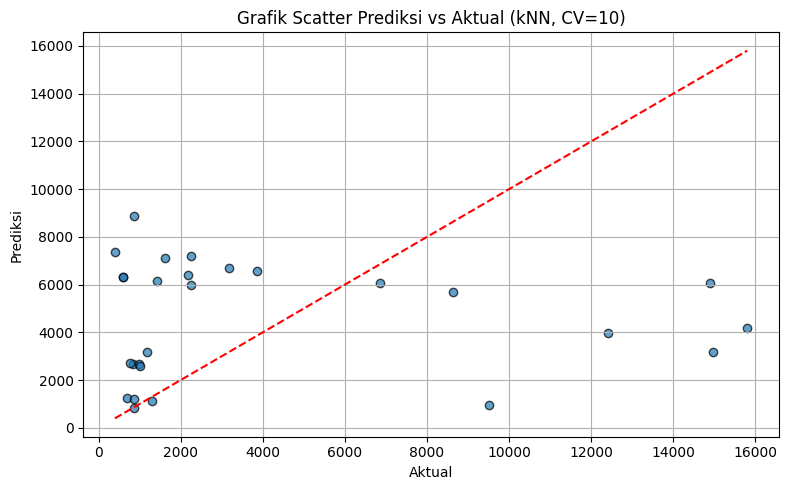

In [340]:
mse = mean_squared_error(y, y_pred_cv)
mae = mean_absolute_error(y, y_pred_cv)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred_cv, alpha=0.7, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # garis diagonal
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Grafik Scatter Prediksi vs Aktual (kNN, CV=10)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [341]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [342]:
X = df_final.drop(columns=["Wilayah Jawa Barat", "Ibu Kota Wilayah", "Persentase Terhadap Luas Wilayah", "Kepadatan_2020"])

In [343]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [344]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


=== K-Means Evaluation ===
Silhouette Score: 0.422
Davies-Bouldin Index: 0.654


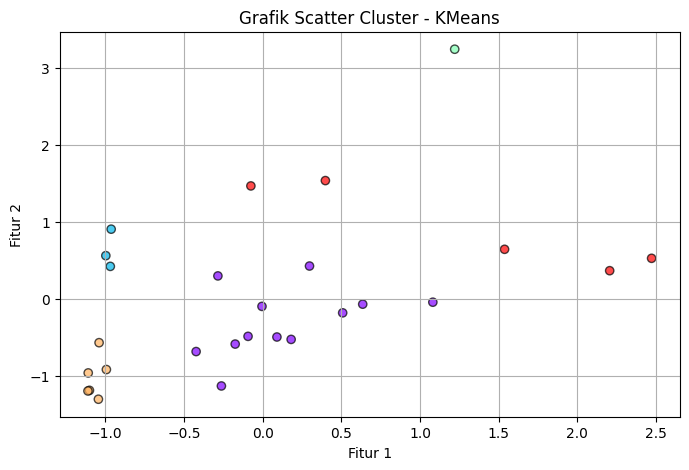

In [345]:
sil_score = silhouette_score(X_scaled, kmeans_labels)
db_score = davies_bouldin_score(X_scaled, kmeans_labels)

print("=== K-Means Evaluation ===")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")

plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='rainbow', alpha=0.7, edgecolors='k')
plt.title("Grafik Scatter Cluster - KMeans")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.grid(True)
plt.show()

In [ ]:
import joblib

joblib.dump(knn_model,'modelprediksi.pkl')

['modelprediksi.pkl']

In [347]:
!ngrok config add-authtoken 2wuW3knNk6fzW1KFL8hFeqO2Iud_4fX6ybBACVDTMFizyWVuo

Authtoken saved to configuration file: C:\Users\Asus\AppData\Local/ngrok/ngrok.yml


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

st.set_page_config(
    page_title="Dashboard Prediksi Kepadatan Penduduk",
)

# Judul
st.title("Prediksi Kepadatan Penduduk Jawa Barat")
st.write("Model ini memprediksi kepadatan penduduk untuk tahun berikutnya berdasarkan data sebelumnya dan luas wilayah.")

model = joblib.load('modelprediksi.pkl')

# Load Dataset
df = pd.read_csv("Jumlah_penduduk_menurut_kabupaten_kota_2018_2020.csv")
dd_2 = pd.read_csv("Luas_daerah_menurut_kabupaten_kota_jawabarat_2020.csv")

# Preprocessing
dd_2.drop(["Jumlah Pulau"], axis=1, inplace=True)
df_final = df.merge(dd_2, left_on="Wilayah Jawa Barat", right_on="Kabupaten/Kota")
df_final.drop(columns=["Kabupaten/Kota"], inplace=True)

df_final["Kepadatan_2018"] = df_final["2018"] / df_final["Luas Wilayah (Km2)"]
df_final["Kepadatan_2019"] = df_final["2019"] / df_final["Luas Wilayah (Km2)"]
df_final["Kepadatan_2020"] = df_final["2020"] / df_final["Luas Wilayah (Km2)"]

# Fitting model untuk demo
X = df_final[["Kepadatan_2018", "Kepadatan_2019"]]
y = df_final["Kepadatan_2020"]
model = LinearRegression()
model.fit(X, y)

st.subheader("Visualisasi Kepadatan Penduduk per Tahun (Bar Chart)")

# Pilih tahun (2018 atau 2019)
tahun_pilihan = st.selectbox("Pilih Tahun", [2018, 2019], key="tahun_bar_chart")

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_final["Wilayah Jawa Barat"], df_final[f"Kepadatan_{tahun_pilihan}"])
ax.set_title(f"Kepadatan Penduduk Tahun {tahun_pilihan}")
ax.set_ylabel("Kepadatan (jiwa/km²)")
ax.set_xticks(np.arange(len(df_final["Wilayah Jawa Barat"])))
ax.set_xticklabels(df_final["Wilayah Jawa Barat"], rotation=90)
ax.grid(True)
st.pyplot(fig)

st.pyplot(fig)

st.subheader("Tabel Kategori Kepadatan Penduduk")

data_kategori = {
    "Rentang Kepadatan (jiwa/km²)": [
        "< 1.000",
        "1.000 – < 5.000",
        "5.000 – < 10.000",
        "10.000 – < 15.000",
        "≥ 15.000"
    ],
    "Kategori": [
        "Sangat Rendah",
        "Rendah",
        "Sedang",
        "Tinggi",
        "Sangat Tinggi"
    ]
}

df_kategori = pd.DataFrame(data_kategori)
st.table(df_kategori)


# Input dari user
st.subheader("Input Data Tahun Sebelumnya")
kepadatan_2018 = st.number_input("Kepadatan 2018", min_value=0.0, step=10.0)
kepadatan_2019 = st.number_input("Kepadatan 2019", min_value=0.0, step=10.0)

if st.button("Prediksi Kepadatan 2020"):
    pred = model.predict([[kepadatan_2018, kepadatan_2019]])
    nilai_prediksi = pred[0]

    # Tentukan label kategori
    if nilai_prediksi < 1000:
        kategori = "Sangat Rendah"
    elif nilai_prediksi < 5000:
        kategori = "Rendah"
    elif nilai_prediksi < 10000:
        kategori = "Sedang"
    elif nilai_prediksi < 15000:
        kategori = "Tinggi"
    else:
        kategori = "Sangat Tinggi"

    st.success(f"Prediksi Kepadatan Tahun 2020: {nilai_prediksi:,.2f} jiwa/km²")
    st.info(f"Kategori Kepadatan: **{kategori}**")

# Tabel Prediksi vs Aktual
df_final["Prediksi_2020"] = model.predict(df_final[["Kepadatan_2018", "Kepadatan_2019"]])
df_final["Selisih_Error"] = df_final["Prediksi_2020"] - df_final["Kepadatan_2020"]

st.subheader("Tabel Prediksi vs Aktual")
st.dataframe(df_final[["Wilayah Jawa Barat", "Kepadatan_2020", "Prediksi_2020", "Selisih_Error"]].round(2))

# Bar Chart Perbandingan
st.subheader("Visualisasi Prediksi vs Aktual per Wilayah")
fig, ax = plt.subplots(figsize=(12, 5))
width = 0.4
x = np.arange(len(df_final["Wilayah Jawa Barat"]))
ax.bar(x - width/2, df_final["Kepadatan_2020"], width=width, label="Aktual")
ax.bar(x + width/2, df_final["Prediksi_2020"], width=width, label="Prediksi")
ax.set_xticks(x)
ax.set_xticklabels(df_final["Wilayah Jawa Barat"], rotation=90)
ax.set_ylabel("Kepadatan (jiwa/km²)")
ax.legend()
st.pyplot(fig)

# Clustering Visualisasi
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

st.subheader("Clustering Wilayah Berdasarkan Kepadatan per Tahun")

# Dropdown untuk memilih tahun
tahun_klaster = st.selectbox("Pilih Tahun untuk Clustering", [2018, 2019, 2020], key="tahun_clustering")

# Lakukan clustering berdasarkan tahun yang dipilih
X_cluster_single = df_final[[f"Kepadatan_{tahun_klaster}"]]
X_scaled_single = StandardScaler().fit_transform(X_cluster_single)

kmeans_single = KMeans(n_clusters=5, random_state=42)
df_final["Cluster_Tahun"] = kmeans_single.fit_predict(X_scaled_single)

# Tampilkan hasil cluster per wilayah
st.write("Hasil Cluster per Wilayah:")
st.dataframe(df_final[["Wilayah Jawa Barat", f"Kepadatan_{tahun_klaster}", "Cluster_Tahun"]].sort_values("Cluster_Tahun").reset_index(drop=True))

# Visualisasi distribusi cluster
fig, ax = plt.subplots()
sns.countplot(x="Cluster_Tahun", data=df_final, ax=ax)
ax.set_title(f"Distribusi Cluster KMeans berdasarkan Kepadatan Tahun {tahun_klaster}")
st.pyplot(fig)


2025-06-05 23:26:00.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:26:00.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:26:00.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:26:00.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:26:00.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:26:00.613 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:26:00.614 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 23:26:00.623 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [349]:
from pyngrok import ngrok
import threading
import time
import os

In [350]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://0fd2-2404-8000-1024-76f0-21b8-dcd4-ed70-804b.ngrok-free.app" -> "http://localhost:8501"
